Authors:
|[Christophe Haikal](https://github.com/ChristopheHAIKAL)|
|[Ryan Jebali](https://github.com/Ryanjebali) | 

# Introduction

## Objective


StarCraft is a military science fiction media franchise created by Chris Metzen and James Phinney and owned by Blizzard Entertainment.The series, set in the beginning of the 26th century, centers on a galactic struggle for dominance among four species—the adaptable and mobile Terrans, the ever-evolving insectoid Zerg, the powerfully enigmatic Protoss, and the godlike Xel'Naga creator race—in a distant part of the Milky Way galaxy known as the Koprulu Sector. The series debuted with the video game StarCraft in 1998. It has grown to include a number of other games as well as eight novelizations, two Amazing Stories articles, a board game, and other licensed merchandise such as collectible statues and toys.

Ranked from the lowest to the highest, the Leagues are: Bronze, Silver, Gold, Platinum, Diamond, Master and Grandmaster. The Copper league, which was formerly below Bronze, was removed in favor of Diamond in beta patch 13. The Master League was added with patch 1.2, and the Grandmaster League was added in 1.3.
Players are placed in a league after having completed 5 placement matches. After that, a player may get moved to another league, depending on performance. Though the time and frequency of these movements are kept explicitly hidden. Regardless of a player's performance, however, placement matches currently do not place players in the highest league, Grandmaster. With even a perfect placement record, a player must work their way through the initial placement division(s) before being placed in Grandmaster.
The objective of this project is to predict the league placement of a Starcraft II player by only using the information contained inside a replay. The real-time nature of the game allows us to differentiate players through the speed and efficiency of their in game actions. This is in an attepmt to  reduce the time taken to arrive at the correct placement.

This report is organised as follows:

 **1. Take a look at the data:**
 - Check the features
 - Which features can be dropped which should be kept?
 - Visualization to analyze correlations importance between our features
   
**2. Try some Modeling**
 - RandomForestClassifier
 - GradientBoostingClassifier
 - KNeighborsClassifier
 - Test all classifiers
 - Test all regressors
 - Neural Network with AutoKeras
 - Evaluate the best model with testing data.
 
 
Compiled from Jupyter Notebook, this report contains both narratives and the Python codes used for data processing, model buiding and evaluation.

## Imports

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
from collections import Counter
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 1. Take a look at the data:

In [2]:
df = pd.read_csv(r'C:\Users\chris\Downloads\SkillCraft1_Dataset.csv')

### Check the Features

In [3]:
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


### League Index Distribution

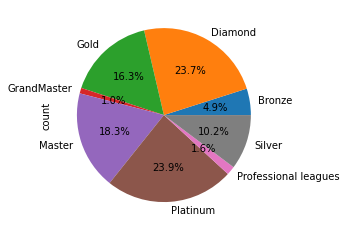

In [4]:
df_count  = df 

df_count['count'] = 0

df_count = df_count.sort_values(by=['LeagueIndex'])

df_count['LeagueIndex'] = df_count['LeagueIndex'].replace([ 1, 2, 3,4,5,6,7,8], ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional leagues'])

data = df_count.groupby("LeagueIndex")["count"].count()

data.plot.pie(autopct="%.1f%%");

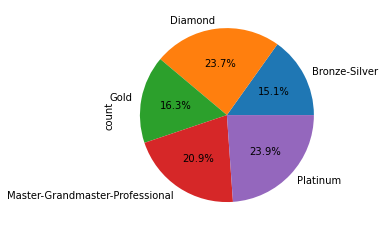

In [5]:
df_count['LeagueIndex'] = df_count['LeagueIndex'].replace( ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional leagues'], ['Bronze-Silver', 'Bronze-Silver', 'Gold', 'Platinum', 'Diamond', 'Master-Grandmaster-Professional', 'Master-Grandmaster-Professional', 'Master-Grandmaster-Professional'])

data = df_count.groupby("LeagueIndex")["count"].count()

data.plot.pie(autopct="%.1f%%");

In [6]:
df = pd.read_csv(r'C:\Users\chris\Downloads\SkillCraft1_Dataset.csv')
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [7]:
print(df.dtypes)

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


### Which rows can be dropped which should be kept?
There is 57 rows with "?" values. 
Our first step of the cleanning is to drop these rows.

In [8]:
df= df.replace('?', np.nan)  
df = df.dropna()

df=df.apply(pd.to_numeric)

In [9]:
print(df.dtypes)

GameID                    int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


In [10]:
df['LeagueIndex'] = df['LeagueIndex'].replace([ 1, 2, 3,4,5,6,7,8], ['1', '1', '2', '3', '4', '5', '5', '5'])

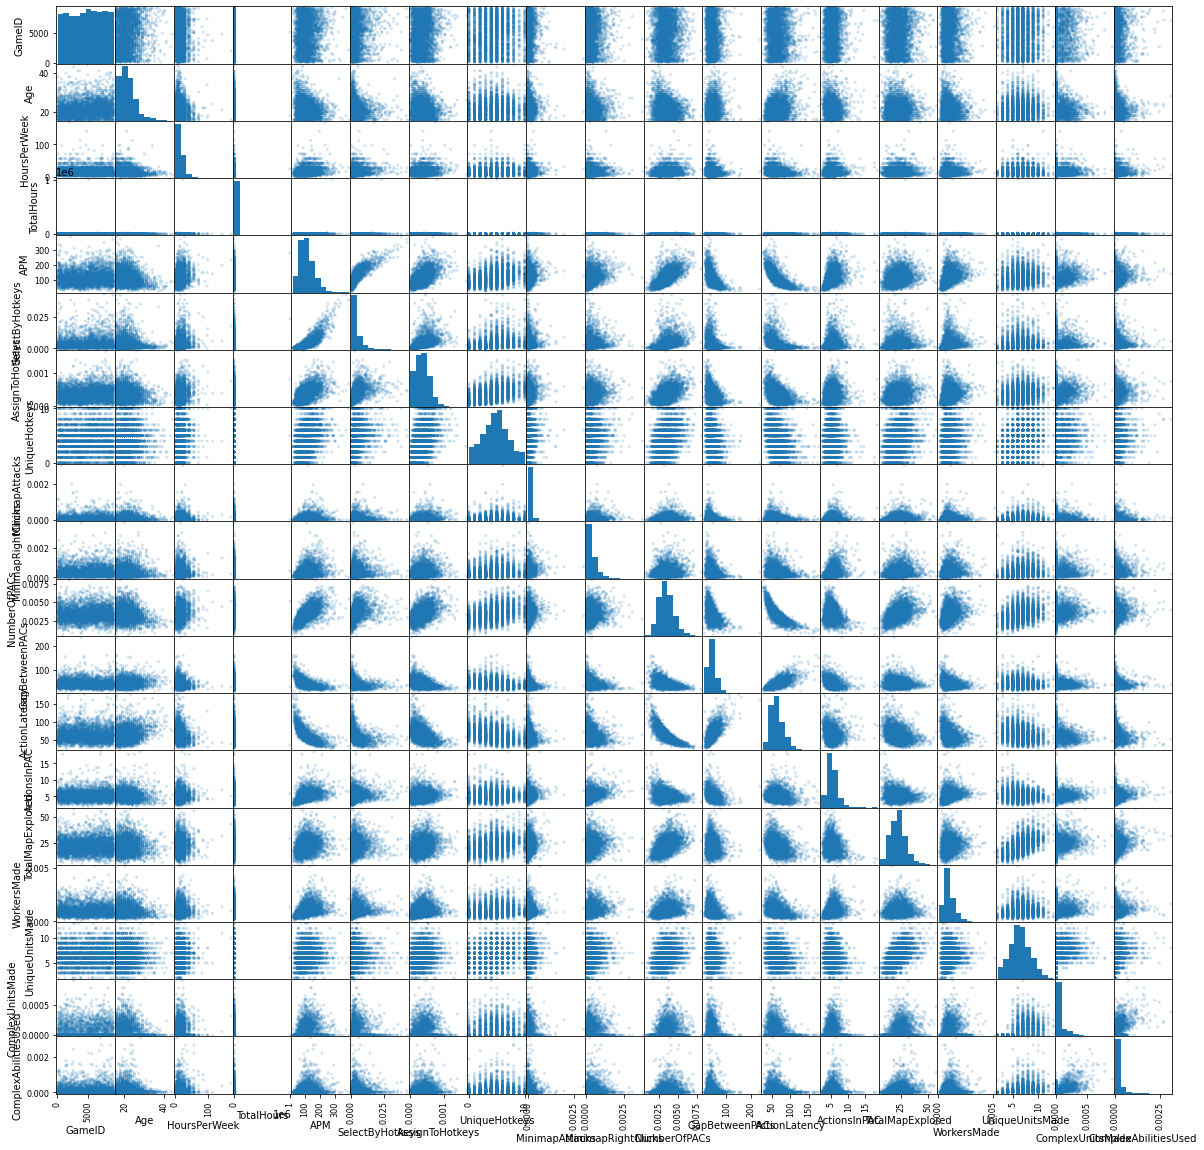

In [11]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (20,20))
plt.show()

This scatter matrix plot outlines some relationships

In [12]:
%matplotlib inline
import colorlover as cl
# Name the leagues
league_lbls = ['Bronze-Silver', 'Gold', 'Platinum', 'Diamond', 'Master-Grandmaster-Professional']
league_indexs = df["LeagueIndex"].unique()
league_indexs.sort()
league_lbls_dict = dict()
for i, ind in enumerate(league_indexs):
    league_lbls_dict[ind] = league_lbls[i]
league_labeled = df["LeagueIndex"].replace(league_lbls_dict)


def clrgb_to_hex(rgb):
    rgb = re.search("\(([^\)]+)\)", rgb).group(1).split(",")
    hex_clr = "#"
    for n in rgb:
        val = hex(int(n))[2:]
        if len(val)<2:
            val = "0"+val
        hex_clr+=val
    return hex_clr


# Define league colours for consistency
league_colours_raw = cl.scales['8']['qual']['Paired']
league_colours = []
for i, clr in enumerate(league_colours_raw):
    league_colours.append(clrgb_to_hex(league_colours_raw[i]))

league_colours_dict = dict()
for i, lbl in enumerate(league_lbls):
    league_colours_dict[lbl] = league_colours[i]
    
    
def box_hist_plot(x, title, w, h):
    fig, (ax_box, ax_hist)= plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15,.85)})
    fig.set_size_inches(w, h)
    
    ax_box.set_xlim(0,x.max())
    ax_hist.set_xlim(0,x.max())
    
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)
    ax_box.set(yticks=[])
    
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    ax_box.set_title(title)
    ax_hist.set_title(None)
    plt.show()
    
def violin_plot(y, title, w, h):
    plt.figure(figsize=(w, h))
    ax1 = sns.violinplot(x=league_labeled, y=y, palette=league_colours_dict, order=league_lbls)
    ax1.set_ylim(0,)
    ax1.set(xlabel='League')
    plt.title(title)
    plt.show()
    
def auto_plot(feature, fig_num):
    box_hist_plot(df[feature], f"Figure {fig_num}: {feature} Distribution", 11, 8)
    violin_plot(df[feature], f"Figure {fig_num+1}: {feature} by League", 11, 8)

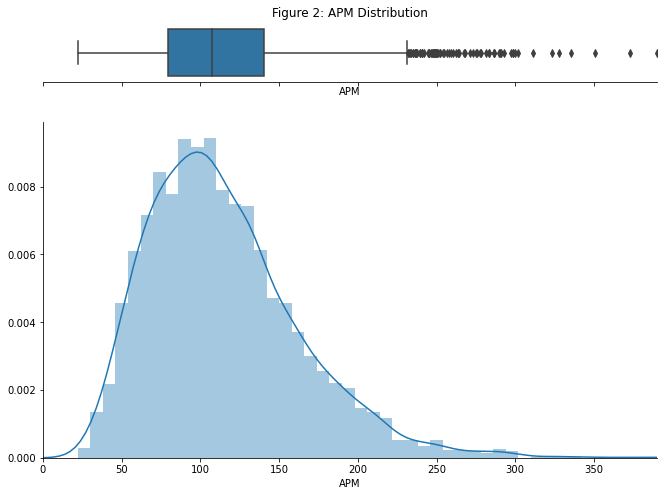

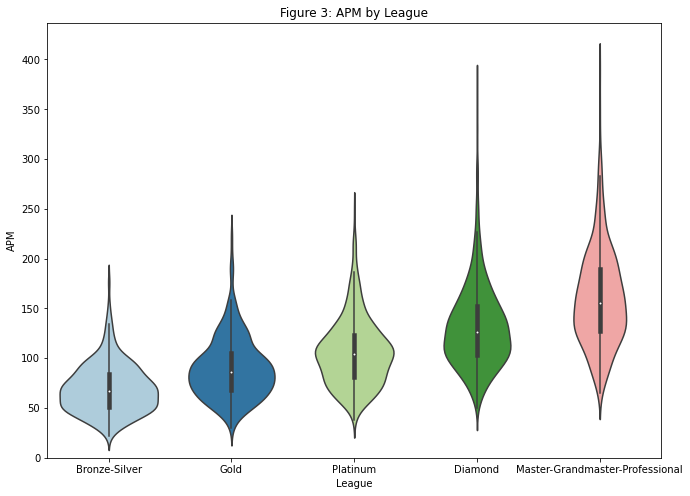

In [13]:
auto_plot("APM",2)

Action per minute (continuous)

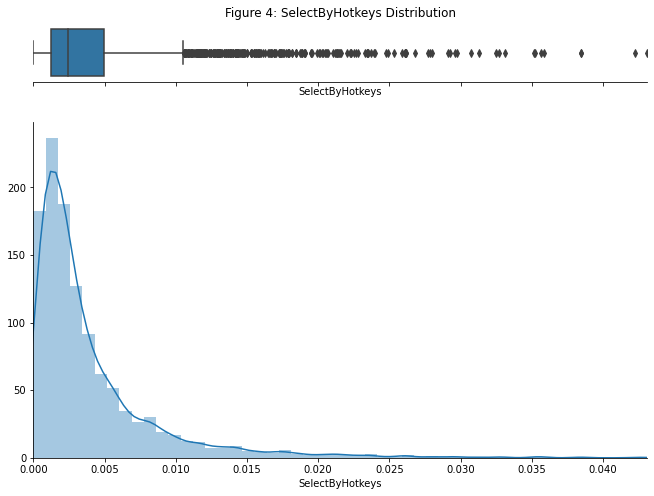

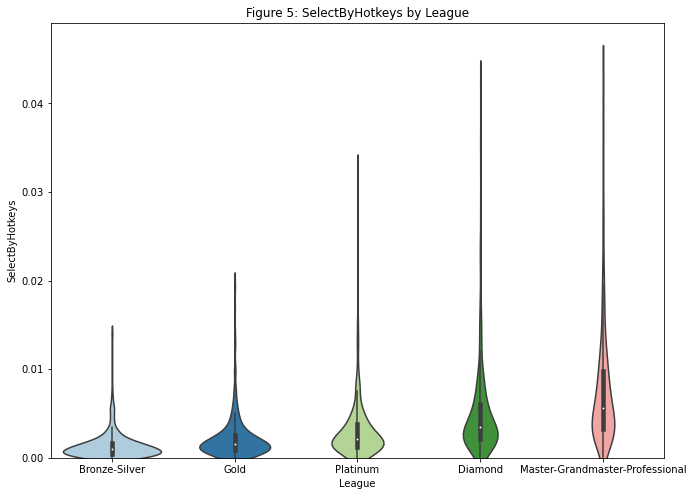

In [14]:
auto_plot("SelectByHotkeys",4)

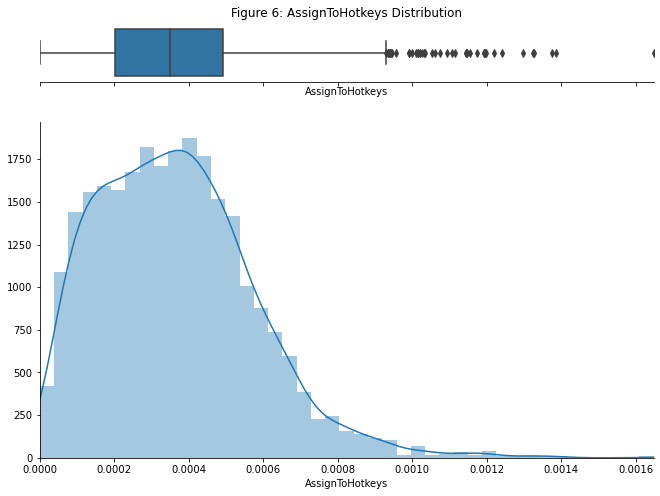

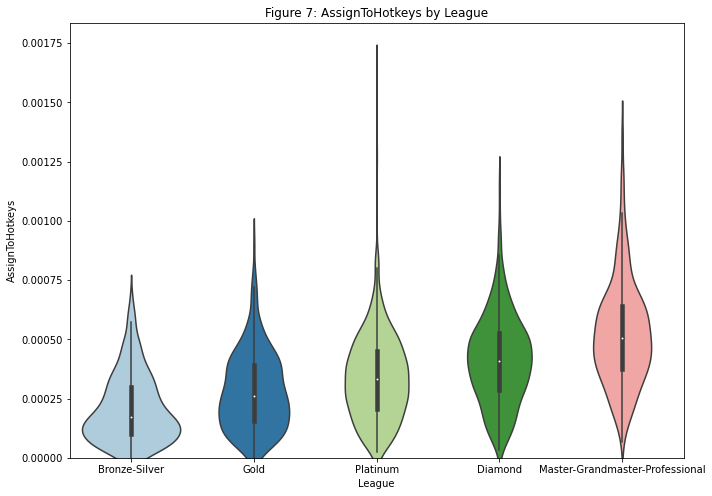

In [15]:
auto_plot("AssignToHotkeys",6)

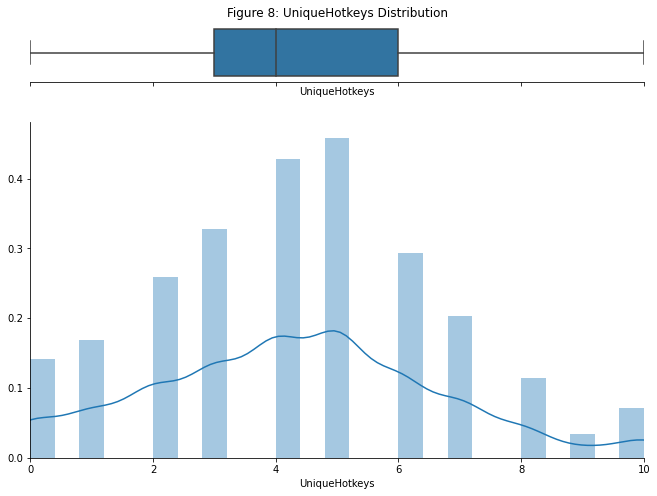

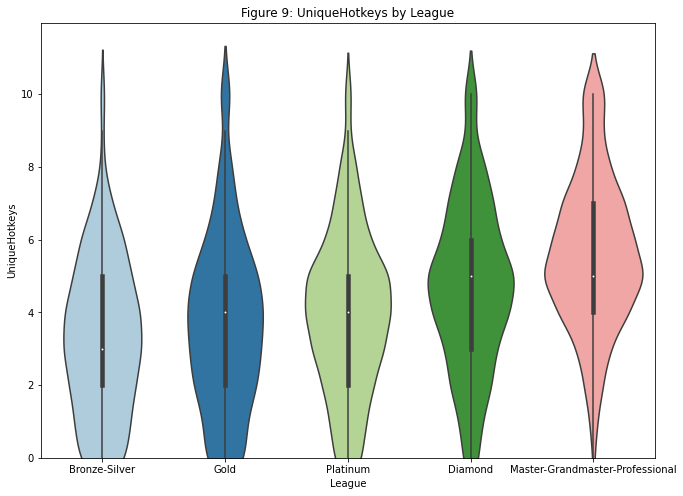

In [16]:
auto_plot("UniqueHotkeys",8)

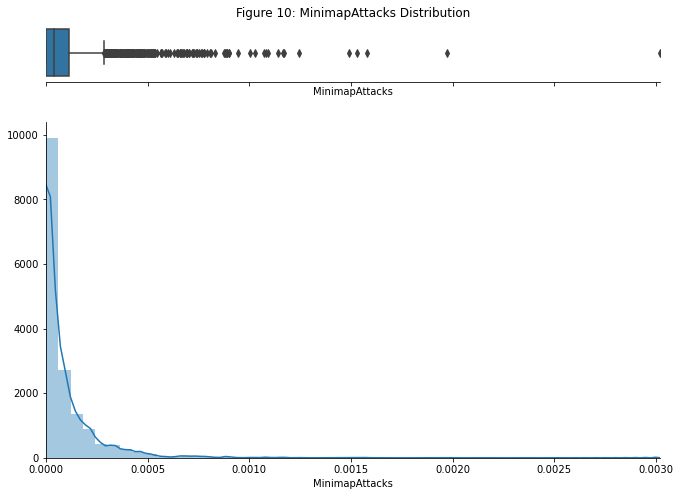

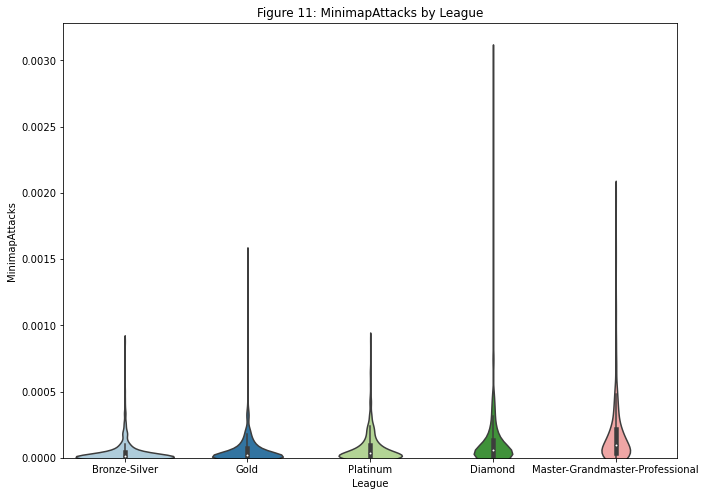

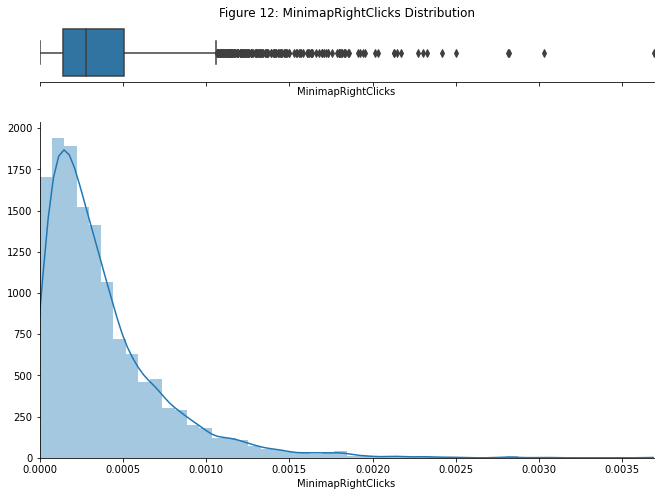

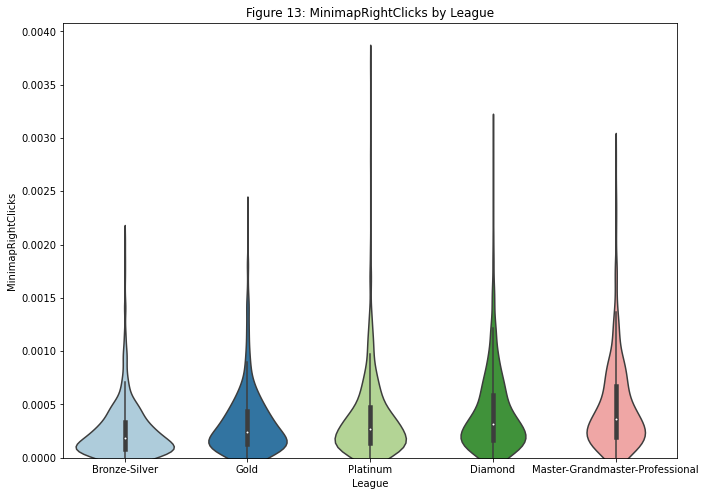

In [17]:
auto_plot("MinimapAttacks",10)
auto_plot("MinimapRightClicks",12)

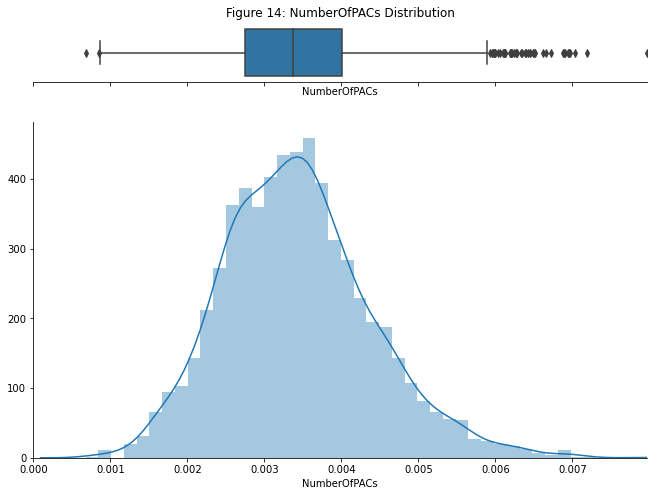

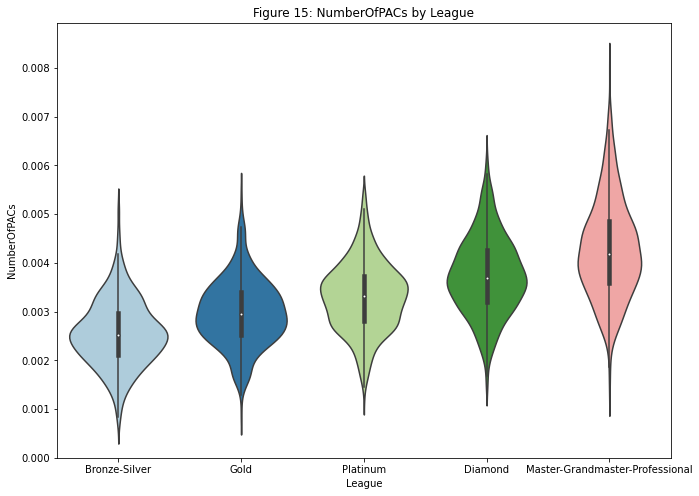

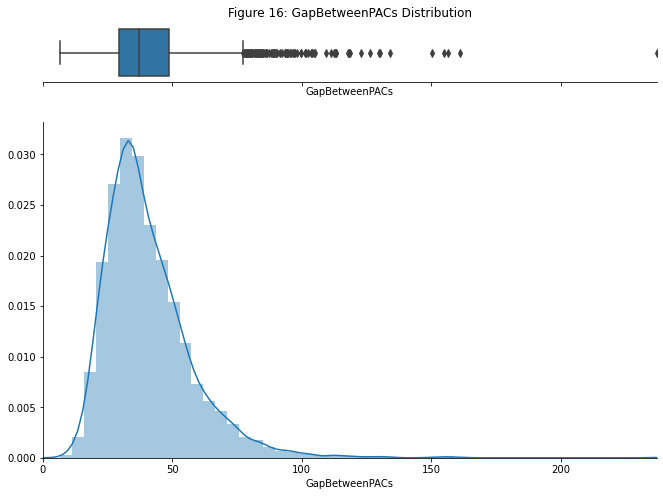

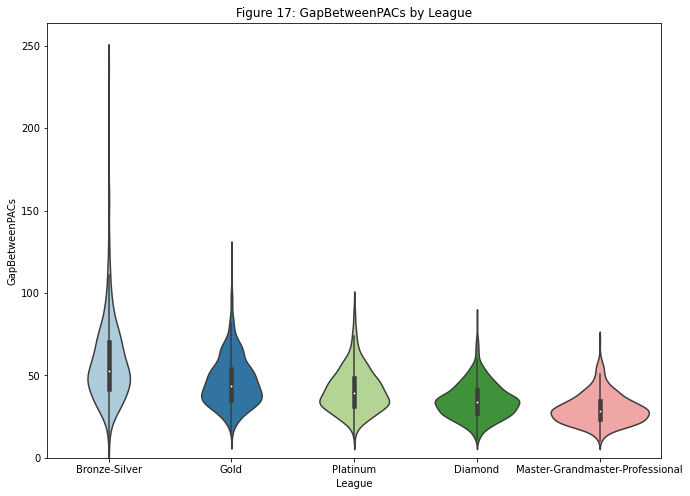

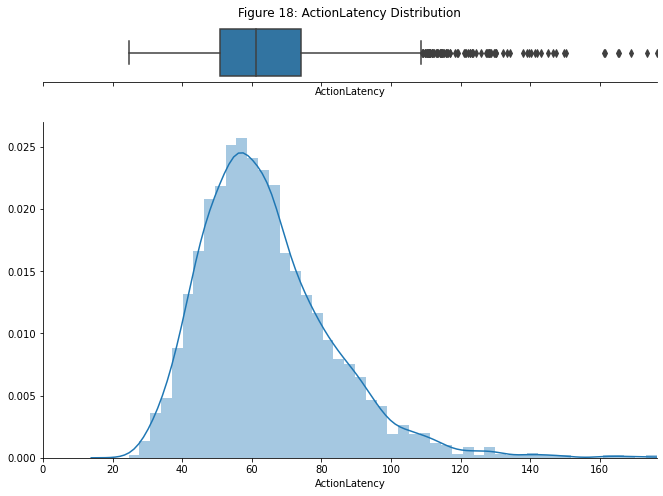

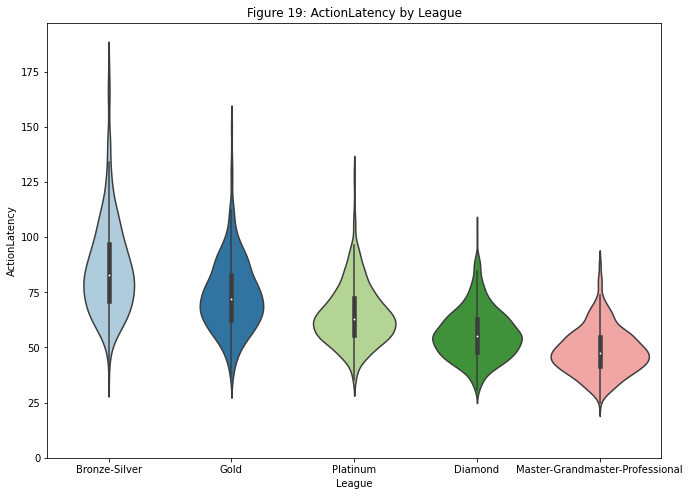

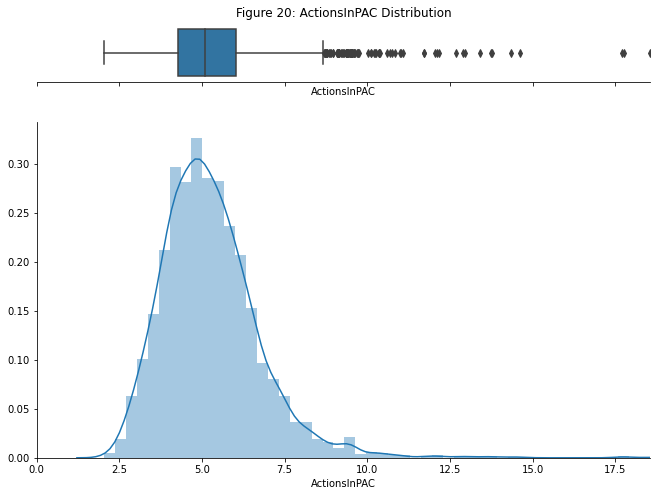

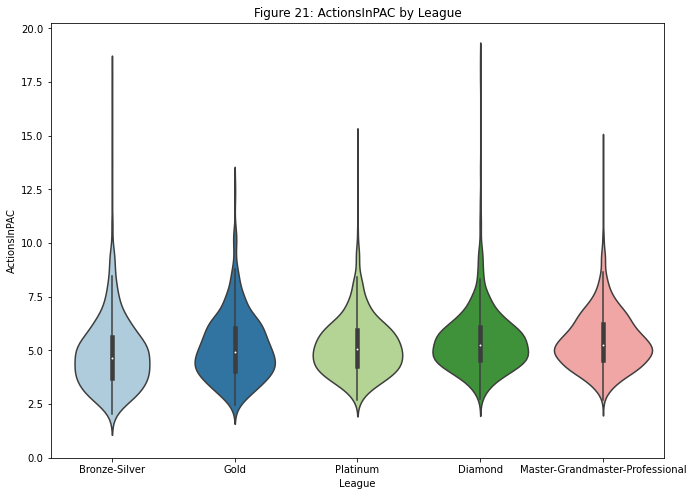

In [18]:
auto_plot("NumberOfPACs",14)
auto_plot("GapBetweenPACs",16)
auto_plot("ActionLatency",18)
auto_plot("ActionsInPAC",20)

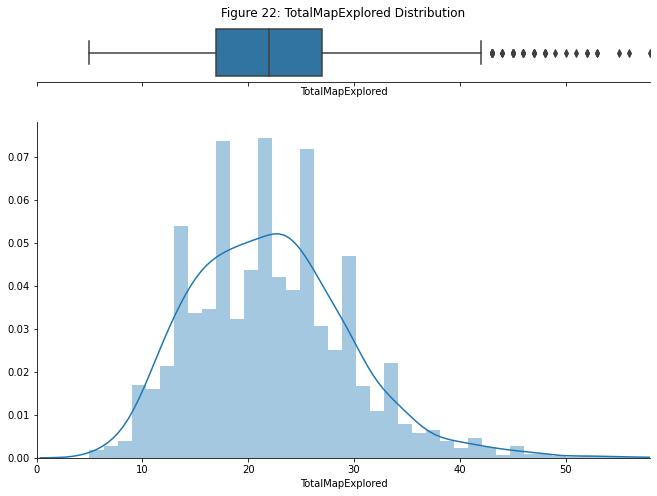

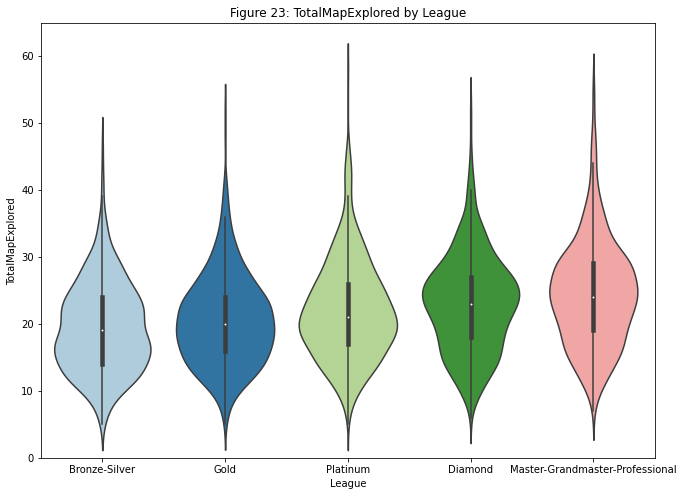

In [19]:
auto_plot("TotalMapExplored",22)

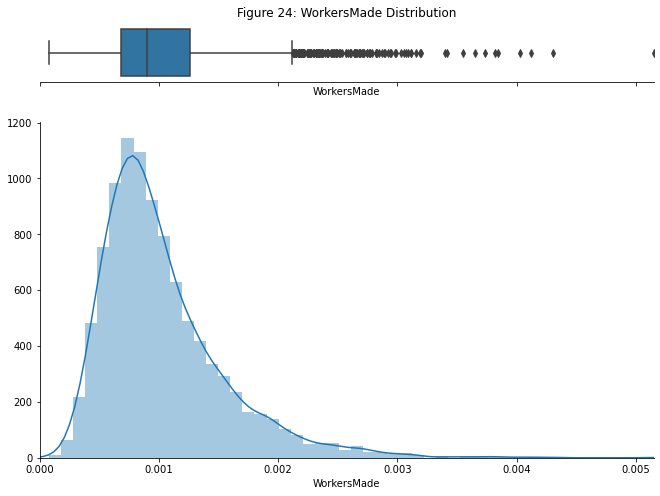

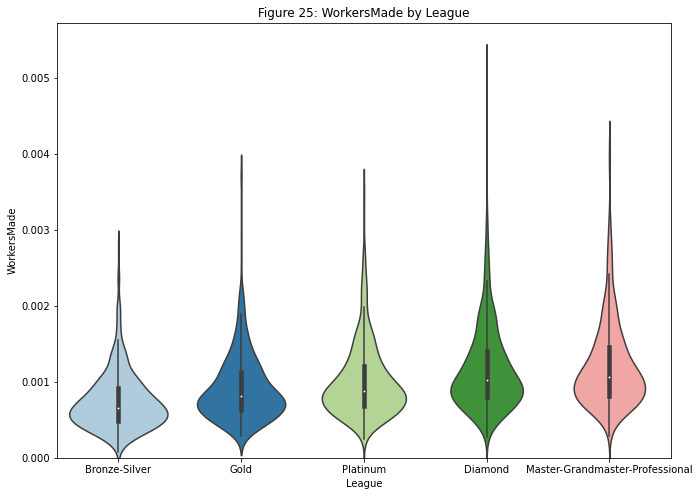

In [20]:
auto_plot("WorkersMade",24)

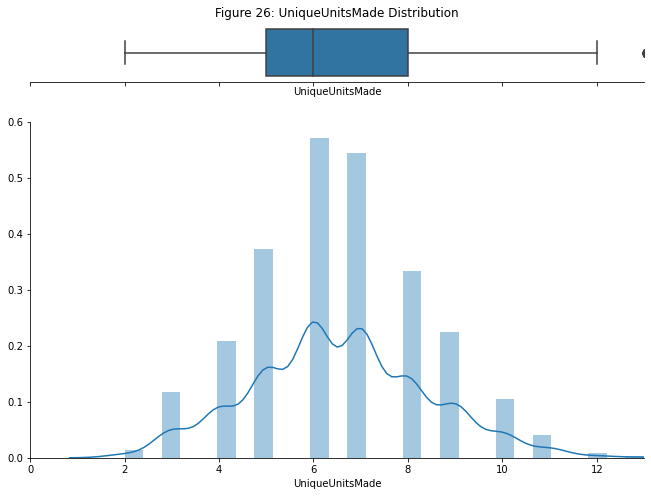

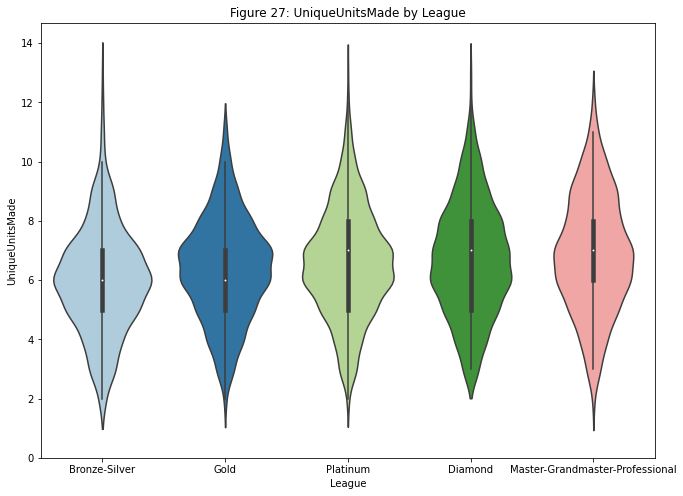

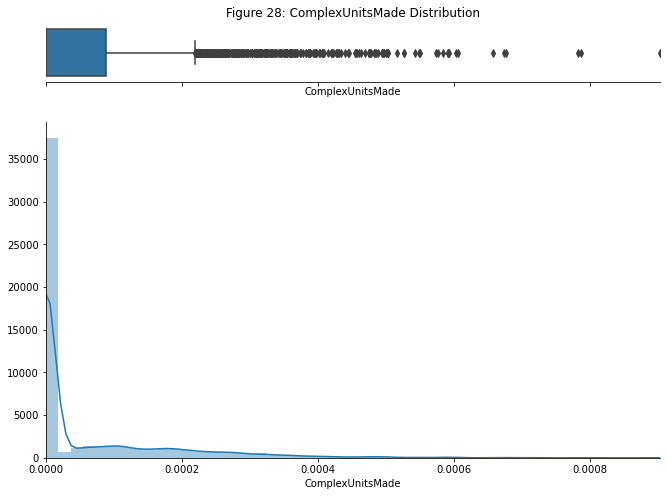

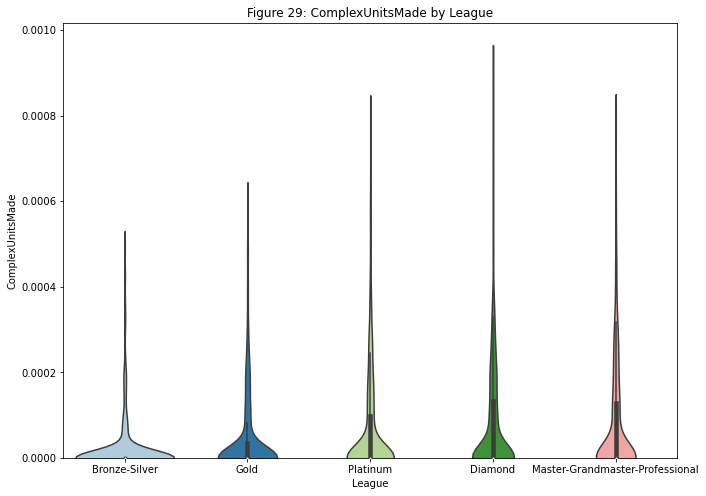

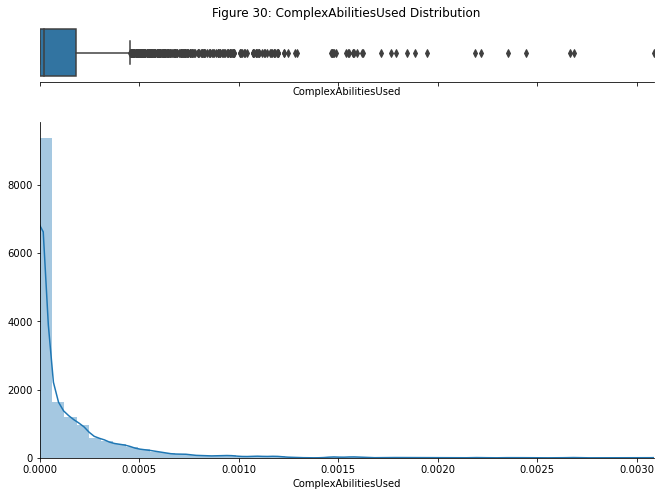

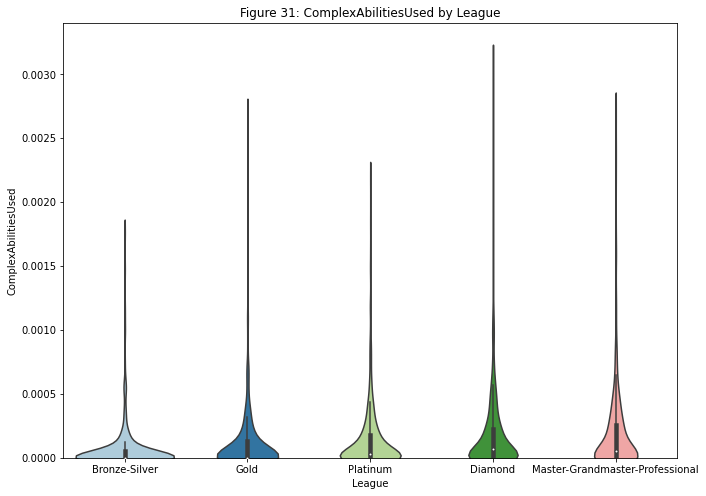

In [21]:
auto_plot("UniqueUnitsMade",26)
auto_plot("ComplexUnitsMade",28)
auto_plot("ComplexAbilitiesUsed",30)

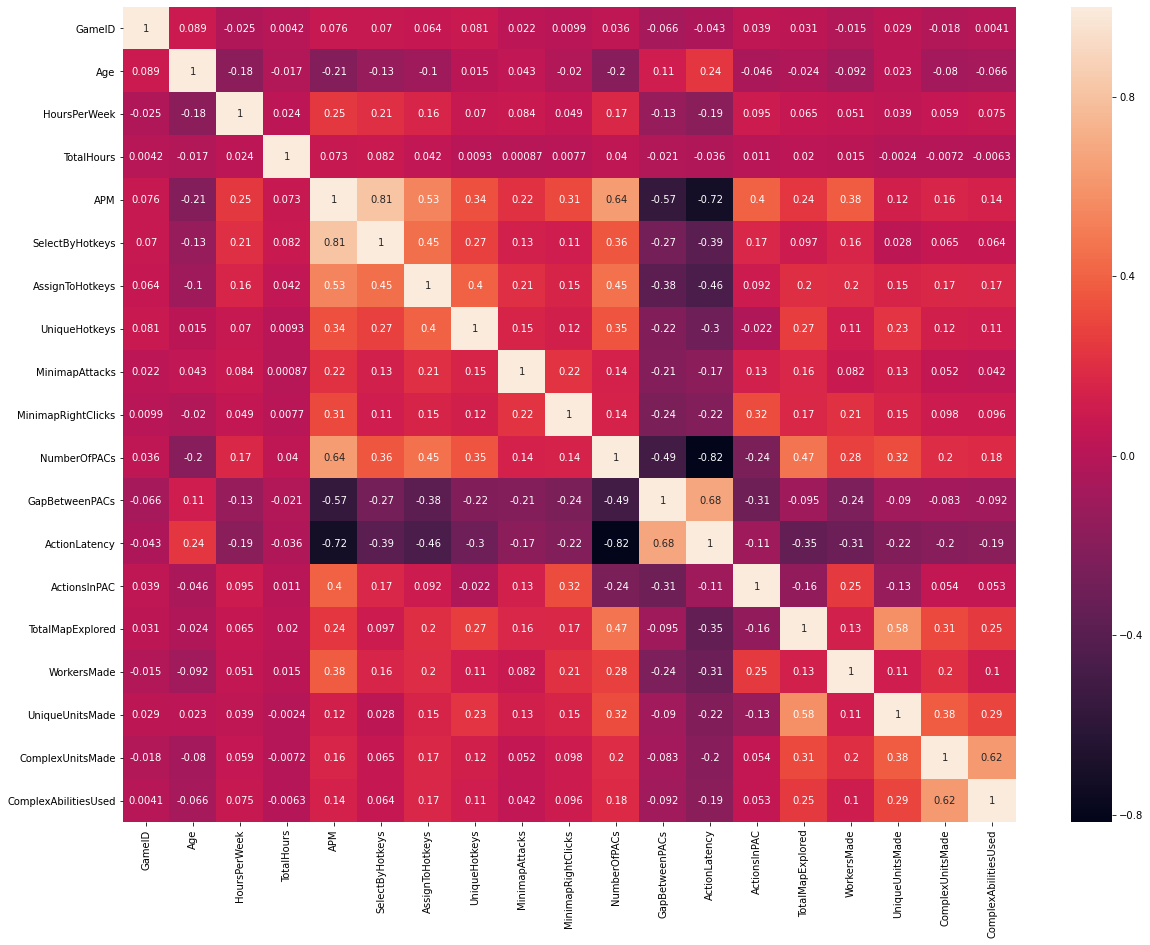

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sn.heatmap(df.corr(), annot=True)
ax

In [15]:
df_1 = df

In [16]:
df = df.drop(columns=['GameID'])

In [17]:
df = df.sample(frac=1)

In [18]:
from sklearn.model_selection import train_test_split
X, y = train_test_split(df, test_size = 0.2, stratify = df['LeagueIndex'], random_state = 42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['LeagueIndex']), df['LeagueIndex'], test_size=0.33, random_state=42)

In [27]:
attrs = X.corr()

In [28]:
attrs

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
Age,1.000000,-0.185244,-0.018371,-0.210629,-0.132232,-0.097698,0.010842,0.045446,-0.025220,-0.190558,0.106957,0.230075,-0.051070,-0.020079,-0.093889,0.029692,-0.072696,-0.058918
HoursPerWeek,-0.185244,1.000000,0.024912,0.235845,0.200120,0.148915,0.073835,0.082336,0.026650,0.171352,-0.124688,-0.179206,0.084623,0.047624,0.036431,0.015877,0.038649,0.064636
TotalHours,-0.018371,0.024912,1.000000,0.079137,0.089264,0.045345,0.009137,-0.000928,0.007693,0.042697,-0.021242,-0.037869,0.010625,0.022084,0.015566,-0.003100,-0.008576,-0.007322
APM,-0.210629,0.235845,0.079137,1.000000,0.816727,0.541292,0.333082,0.212915,0.296982,0.625772,-0.563622,-0.717674,0.402101,0.239418,0.369251,0.122206,0.168150,0.137707
SelectByHotkeys,-0.132232,0.200120,0.089264,0.816727,1.000000,0.460551,0.277416,0.129593,0.102208,0.354516,-0.271961,-0.389181,0.170021,0.099245,0.156663,0.026504,0.074715,0.065145
AssignToHotkeys,-0.097698,0.148915,0.045345,0.541292,0.460551,1.000000,0.403686,0.215032,0.151128,0.446391,-0.371838,-0.456355,0.097455,0.208996,0.195780,0.151908,0.181665,0.175809
UniqueHotkeys,0.010842,0.073835,0.009137,0.333082,0.277416,0.403686,1.000000,0.140958,0.112939,0.351565,-0.223227,-0.301591,-0.033291,0.265546,0.102350,0.228429,0.131446,0.106675
MinimapAttacks,0.045446,0.082336,-0.000928,0.212915,0.129593,0.215032,0.140958,1.000000,0.208905,0.127371,-0.203950,-0.160003,0.131895,0.158748,0.097810,0.130625,0.060855,0.044059
MinimapRightClicks,-0.025220,0.026650,0.007693,0.296982,0.102208,0.151128,0.112939,0.208905,1.000000,0.135177,-0.228014,-0.210056,0.317742,0.174009,0.208997,0.154358,0.106330,0.091561
NumberOfPACs,-0.190558,0.171352,0.042697,0.625772,0.354516,0.446391,0.351565,0.127371,0.135177,1.000000,-0.486322,-0.812805,-0.255802,0.474628,0.266401,0.323650,0.194810,0.171543


In [29]:
 #only important correlations and not auto-correlations
threshold = 0.1
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
64,"(APM, SelectByHotkeys)",0.816727
59,"(ActionLatency, NumberOfPACs)",-0.812805
76,"(APM, ActionLatency)",-0.717674
15,"(ActionLatency, GapBetweenPACs)",0.681513
93,"(APM, NumberOfPACs)",0.625772
...,...,...
38,"(ComplexAbilitiesUsed, UniqueHotkeys)",0.106675
10,"(ComplexUnitsMade, MinimapRightClicks)",0.106330
50,"(UniqueHotkeys, WorkersMade)",0.102350
83,"(MinimapRightClicks, SelectByHotkeys)",0.102208


In [30]:
# Recipe from https://github.com/mgalardini/python_plotting_snippets/blob/master/notebooks/clusters.ipynb
import matplotlib.patches as patches
from scipy.cluster import hierarchy
from scipy.stats.mstats import mquantiles
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
# Correlate the data
# also precompute the linkage
# so we can pick up the 
# hierarchical thresholds beforehand

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# scale to mean 0, variance 1
train_std = pd.DataFrame(scale(X))
train_std.columns = X.columns
m = train_std.corr()
l = linkage(m, 'ward')

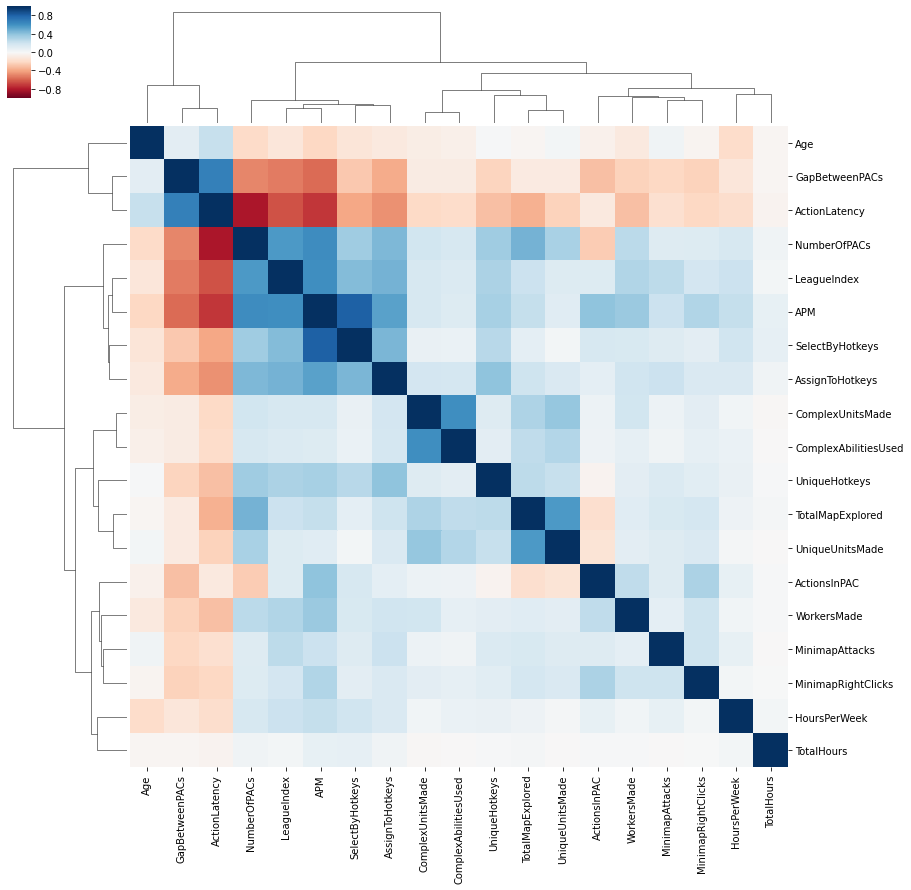

In [32]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(14, 14),
               row_linkage=l,
               col_linkage=l)

In [33]:
# Threshold 1: median of the
# distance thresholds computed by scipy
t = np.median(hierarchy.maxdists(l))

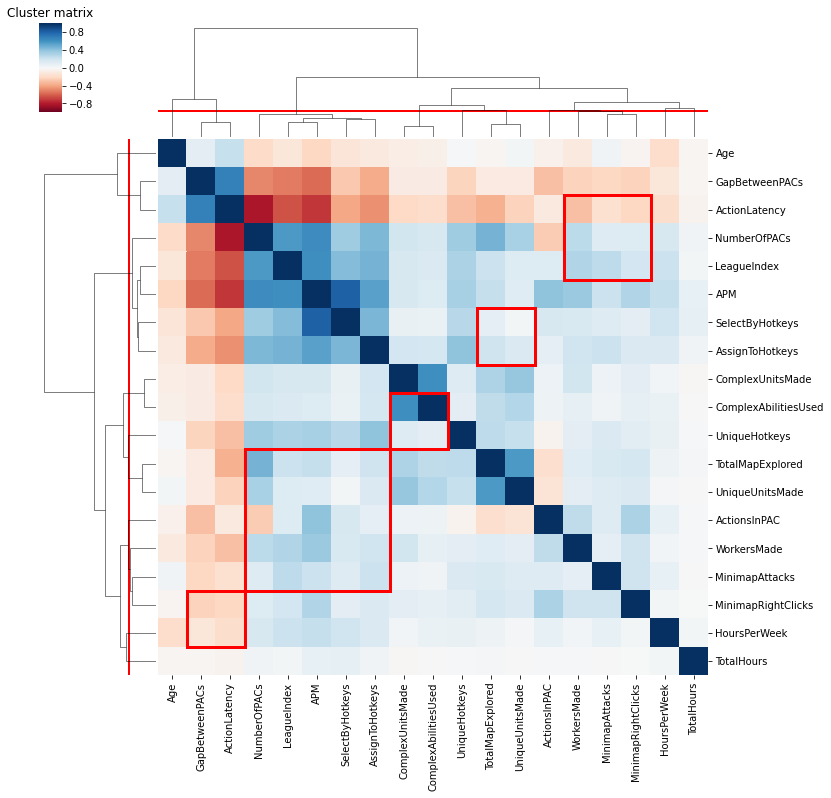

In [34]:
# Plot the clustermap
# Save the returned object for further plotting
mclust = sns.clustermap(m,
               linewidths=0,
               cmap=plt.get_cmap('RdBu'),
               vmax=1,
               vmin=-1,
               figsize=(12, 12),
               row_linkage=l,
               col_linkage=l)
# Draw the threshold lines
mclust.ax_col_dendrogram.hlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)
mclust.ax_row_dendrogram.vlines(t,
                               0,
                               m.shape[0]*10,
                               colors='r',
                               linewidths=2,
                               zorder=1)

# Extract the clusters
clusters = hierarchy.fcluster(l, t, 'distance')
for c in set(clusters):
    # Retrieve the position in the clustered matrix
    index = [x for x in range(m.shape[0])
             if mclust.data2d.columns[x] in m.index[clusters == c]]
    # No singletons, please
    if len(index) == 1:
        continue
        # Draw a rectangle around the cluster
    mclust.ax_heatmap.add_patch(
        patches.Rectangle(
            (min(index),
             m.shape[0] - max(index) - 1),
                len(index),
                len(index),
                facecolor='none',
                edgecolor='r',
                lw=3)
        )

plt.title('Cluster matrix')

pass


# 2. Doing some Modeling:

### Random Forest Classifer - Feature Importance

,importance
feature,
ActionLatency,0.124
APM,0.102
TotalHours,0.081
GapBetweenPACs,0.079
NumberOfPACs,0.076
SelectByHotkeys,0.074
AssignToHotkeys,0.065
WorkersMade,0.051
MinimapAttacks,0.050


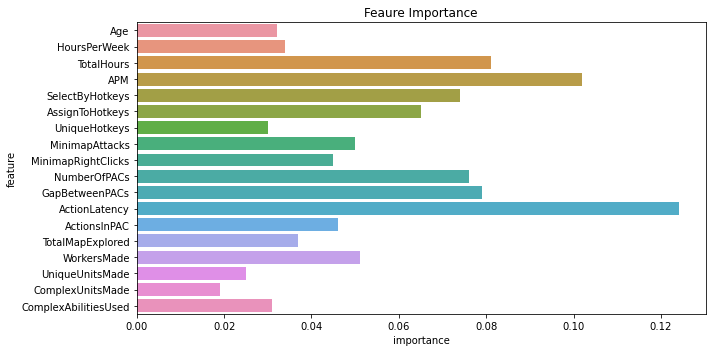

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
importances = pd.DataFrame({'feature':list(df.drop(columns=['LeagueIndex']).columns),'importance':np.round(model.feature_importances_,3)})

plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

### Gradient Boosting Classifier - Feature Importance

,importance
feature,
ActionLatency,0.138
APM,0.118
TotalHours,0.076
GapBetweenPACs,0.073
NumberOfPACs,0.067
SelectByHotkeys,0.058
AssignToHotkeys,0.058
WorkersMade,0.056
MinimapAttacks,0.056


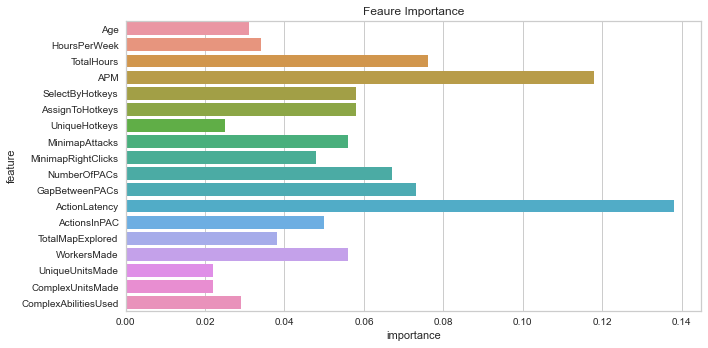

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
importances = pd.DataFrame({'feature':list(df.drop(columns=['LeagueIndex']).columns),'importance':np.round(model.feature_importances_,3)})

plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

In [38]:
### Dummy Classifier (as baseline)

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test)

0.2413793103448276

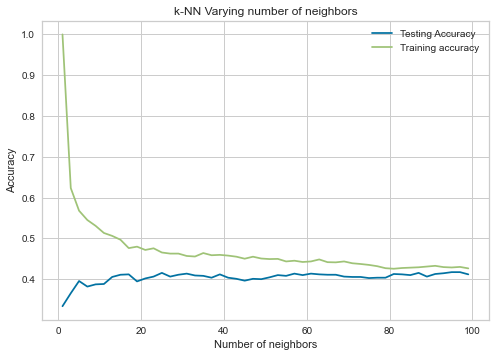

95

In [39]:
### KNN

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100,2)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#We achieved a slightly better score with the KNN

max(test_accuracy)

#which iteration is the best:
(list(test_accuracy).index(max(test_accuracy))*2)+1

### Random Forest Classifer - RFECV

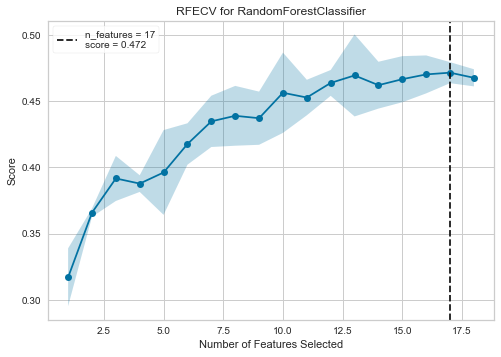

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification datase

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train)       # Fit the data to the visualizer
visualizer.show() 

In [27]:
X_train.columns

Index(['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [28]:
visualizer.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True])

In [29]:
df_RFECV= df[['LeagueIndex','TotalHours', 'APM', 'SelectByHotkeys','AssignToHotkeys','MinimapAttacks','NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC','WorkersMade']]
df_RFECV = df_RFECV.sample(frac=1)
X_train_RFECV, X_test_RFECV, y_train_RFECV, y_test_RFECV = train_test_split(df_RFECV.drop(columns=['LeagueIndex']), df_RFECV['LeagueIndex'], test_size=0.33, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model_RFECV = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

model_RFECV.fit(X_train_RFECV, y_train_RFECV)
model_RFECV.score(X_test_RFECV,y_test_RFECV)

0.472

In [37]:
##saving the model for the API 
import joblib
joblib.dump(model_RFECV, 'model_RFECV.joblib')

['model_RFECV.joblib']

In [35]:
# load the model from disk
loaded_model = joblib.load('model_RFECV')
result = loaded_model.score(X_test_RFECV, y_test_RFECV)

In [38]:
result

0.472

## Confusion Matrix

In [94]:
y_pred_test = model_RFECV.predict(X_test_RFECV)

In [97]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_pred_test)

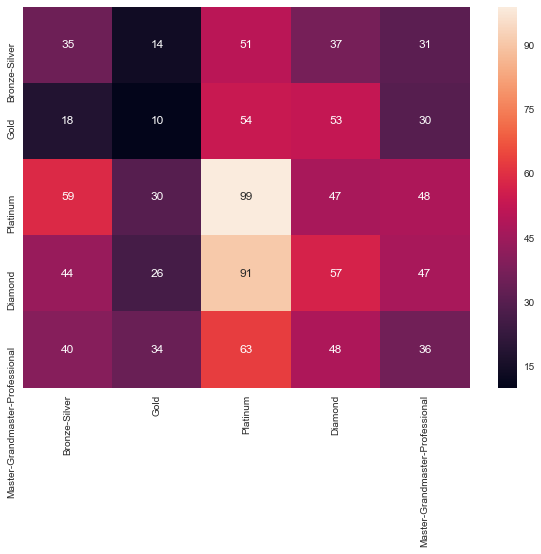

In [102]:
df_cm = pd.DataFrame(array, index = [i for i in ['Bronze-Silver', 'Gold', 'Platinum', 'Diamond', 'Master-Grandmaster-Professional']],
                  columns = [i for i in ['Bronze-Silver', 'Gold', 'Platinum', 'Diamond', 'Master-Grandmaster-Professional']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [83]:
np.random.seed(1)

### Classifiers

from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='classifier')

all_clfs = []
for name, ClassifierClass in estimators:
    #print('Appending', name)
    try:
        clf = ClassifierClass()
        all_clfs.append(clf)
    except Exception as e:
        #print('Unable to import', name)
        print(e)

results = []
for algo in all_clfs:
    try:
        algo.fit(X_train, y_train)
        performance = algo.score(X_test, y_test)
        results.append(performance)
        print(performance)
    except Exception as e:
        #print('Unable to import', name)
        print(e)

all_clfs[results.index(max(results))]

__init__() missing 1 required positional argument: 'base_estimator'
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'estimators'
__init__() missing 1 required positional argument: 'estimators'
0.45099818511796735
0.3811252268602541
0.27223230490018147
0.43466424682395643
index 18 is out of bounds for axis 1 with size 18
0.3275862068965517
0.36388384754990927
0.20598911070780399
0.3838475499092559
0.4618874773139746
0.42286751361161523
0.23049001814882034
0.4165154264972777
0.4283121597096189
0.3956442831215971
0.1442831215970962
0.1442831215970962
SVD did not converge
0.15063520871143377
0.4364791288566243
0.44283121597096187
0.42105263157894735
0.37295825771324864
0.3021778584392015
0.3003629764065336
0.16878402903811252
0.25317604355

ExtraTreeClassifier()

In [45]:
import tensorflow as tf
import autokeras as ak

In [46]:
# It tries 50 different models.
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=50)
# Feed the structured data classifier with training data.
clf.fit(X_train, y_train, epochs=100)
# Predict with the best model.
predicted_y = clf.predict(X_test)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Trial 28 Complete [00h 00m 11s]
val_accuracy: 0.4189189076423645

Best val_accuracy So Far: 0.4752252399921417
Total elapsed time: 00h 05m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 1.5801 - accuracy: 0.2514
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 1.4018 - accuracy: 0.3553
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 1.3130 - accuracy: 0.3866
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2686 - accuracy: 0.4196
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2529 - accuracy: 0.4242
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2375 - accuracy: 0.4418
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2121 - accuracy: 0.4645
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 1.2090 - accuracy: 0.4650
Epoch 9/100
70/70 [========

In [47]:
# export the best model found by AutoKeras as a Keras Model.
model = clf.export_model()
# summarize the loaded model
model.summary()

model.save('model_clf.tf')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 18)                0         
_________________________________________________________________
normalization (Normalization (None, 18)                37        
_________________________________________________________________
dense (Dense)                (None, 32)                608       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

## Trying some regressor

In [41]:
### Dummy Regressor (as baseline)

import numpy as np
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-0.010031570739284845

In [42]:
## regressor
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

all_regs = []
for name, ClassifierClass in estimators:
    #print('Appending', name)
    try:
        clf = ClassifierClass()
        all_regs.append(clf)
    except Exception as e:
        #print('Unable to import', name)
        print(e)

results_regs = []
for algo in all_regs:
    try:
        algo.fit(X_train, y_train)
        performance = algo.score(X_test, y_test)
        results.append(performance)
        print(performance)
    except Exception as e:
        print(e)



__init__() missing 1 required positional argument: 'estimator'
__init__() missing 1 required positional argument: 'base_estimator'
__init__() missing 1 required positional argument: 'estimators'
__init__() missing 1 required positional argument: 'estimators'
0.5039735957991136
0.50227553454688
0.5384089384232231
0.4802423338569103
-0.38092473575171404
0.10240461926102029
-0.010031570739284845
0.4644145302106213
-0.009767083901775386
0.08683357460354502
0.5744674595158308
unsupported operand type(s) for /: 'float' and 'str'
-5.848237779220662
0.5911728595736901
0.581438346549797
0.408120026541301
X should be a 1d array
unsupported operand type(s) for /: 'str' and 'int'
0.4032450182411791
0.5118662673334003
0.4362626655434536
0.45953476415279004
-0.00976708372577062
-0.010031570739284845
0.4362626655434536
0.5061271306000457
0.511866267333335
0.2854973387058316
-2.4385167620855674
For mono-task outputs, use ElasticNet
For mono-task outputs, use ElasticNetCV
For mono-task outputs, use Ela

In [43]:
### Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

0.8601384233723197

In [44]:
reg.score(X_test, y_test)

0.590480724698471

the best model so far is model_RFECV 
let's make it an api 
https://datagraphi.com/blog/post/2019/12/19/rest-api-guide-productionizing-a-machine-learning-model-by-creating-a-rest-api-with-python-django-and-django-rest-framework